In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 10: Examples 1

Well, that's long enough to go without doing some actual work! Let's see what is possible to do so far.|

## Where do Chords move to?

Let's take our favorite work so far, Bach's BWV 66.6, and see where each chord goes.

We'll begin, as always, with importing `music21` and parsing the work from the corpus.

In [2]:
from music21 import *
s = corpus.parse('bwv66.6')

Now let's chordify it.

In [3]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

`sChords` is a Part containing no Chords! It has measures, which contain Chords. We're going to want to see all the chords, so let's flatten it with `.flatten()`.

In [4]:
sFlat = sChords.flatten()
sFlat

<music21.stream.Part Soprano_flat>

Inside `sChords` is not just chords, but also the time signatures, etc., so let's create a Stream that only has the chords in sChords. And we'll get rid of all internal barlines, measures, etc.  We'll use `.getElementsByClass('Chord')` for that:

In [5]:
sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

<music21.stream.iterator.StreamIterator for Part:Soprano_flat @:0>

We are eventually going to want to display each chord, so we'll create a new `Stream` to do so.  We'll make it a `Part` object:

In [6]:
displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

Now we're going to want to look at each chord and the following chord, so we want to go from the first chord, index `0`, to the second to last chord, index `len(sOnlyChords) - 1`, and then get each chord and the next chord. We will do that with the following sequence of commands

In [7]:
for i in range(0, len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    # do something with thisChord and nextChord here

_Python hint_: `range(min, max)` or `range(max)` is a "generator" function
that yields every number starting with `min` (or zero if no min is given)
to one less than the maximum number.  `range()` is a really useful function,
and we will use it all the time to do the same thing over a whole bunch of items.  For instance:

In [1]:
for n in range(5):
    print(n)

0
1
2
3
4


Then for each chord pair, we can create a new measure and append it to `displayPart` only if the first chord of each group is a triad or a seventh.  For the purposes of making this example short, let's do it only if the first chord's root is "A". And we can put them all in closed position.

We can create a new function to do all this and call it `appendChordPairs()`

In [8]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

Okay, so I think we have this set up.  Let's replace "`# do something`" with `appendChordPairs()`:

In [9]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

Do we have it?  Let's see if `displayPart` has anything in it?

In [10]:
len(displayPart)

7

Only seven pairs of chords, well, we did limit it to chords built on `A`. Let's see it!

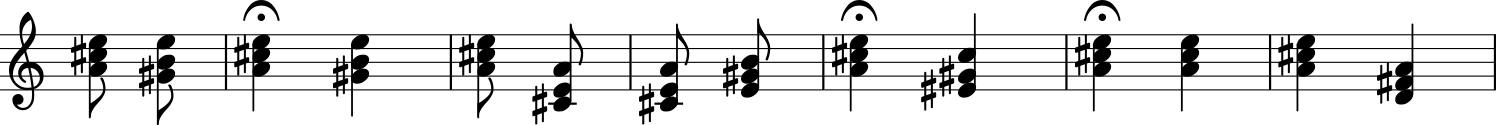

In [11]:
displayPart.show()

Learning from the last chapter, we can label the chords with Roman Numerals in the key of A.  Obviously, the first chord is always going to be "I", but where does "I" move to?  That's more interesting. We'll cheat and use an analysis technique we'll later see in :ref:`Chapter 23 <usersGuide_23_romanNumerals>`.

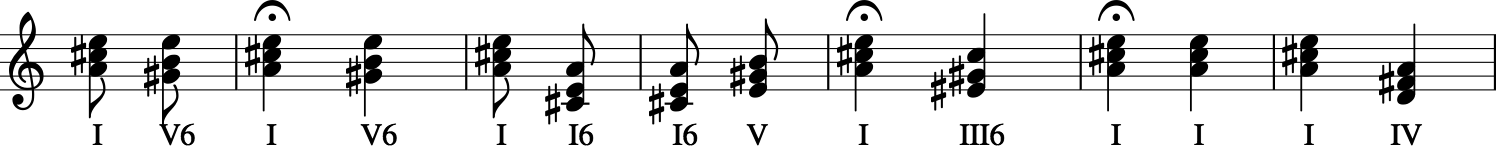

In [12]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()

Well, it's basically everything that I expected, except for that `III6` chord! I smell a modulation happening here.  Let's make all the pitches of that Chord pink so we can find them later.  And we'll softly introduce a new concept, the `derivation.chain()` (see :ref:`Chapter 13<usersGuide_13_music21object2>`) to make sure that everything that this note comes from is also pink.

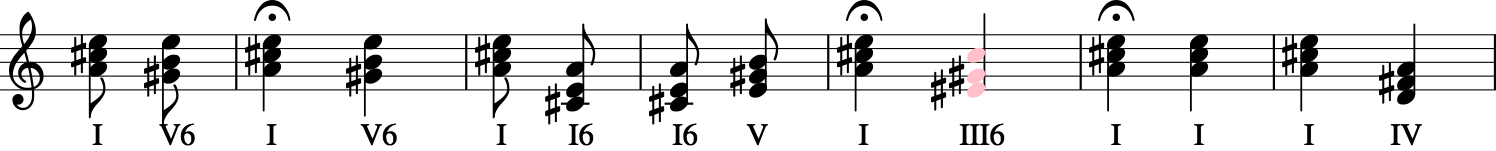

In [13]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.style.color = 'pink'
        for x in c.derivation.chain():
            x.style.color = 'pink'

displayPart.show()

Now we can find this chord more easily:

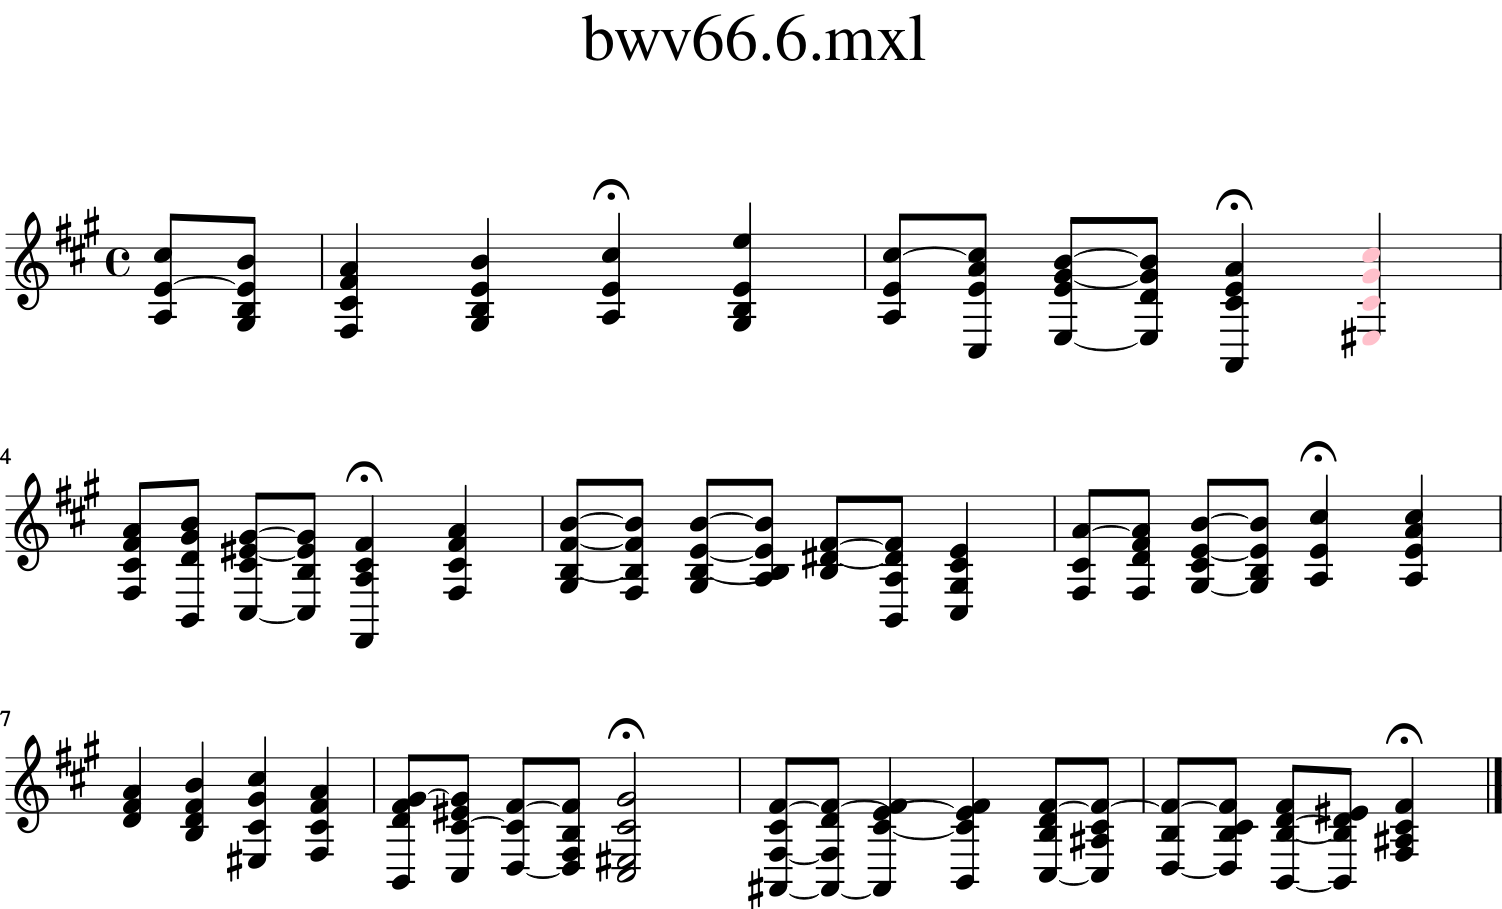

In [14]:
sChords.show()

And we can analyze each Measure's key to show that indeed it is part of a modulation to f# minor:

In [15]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor


This is a brief summary of some things we can do so far.  I'd like to use other pieces besides this Chorale, so let's move on to :ref:`Chapter 11: Corpus Searching <usersGuide_11_corpusSearching>` to learn more.